# Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Рисовать график можно непосредственно на plt (на рисунке) или на осях (системе координат).<br>
Если мы пишем `plt.plot(x, np.sin(x))`, то рисунок (`figure`) и система координат (`axes`) создаются в фоновом режиме.

В нотбуке команду `plt.show()` можно не писать, поставив точку с запятой после последней команды `plt`

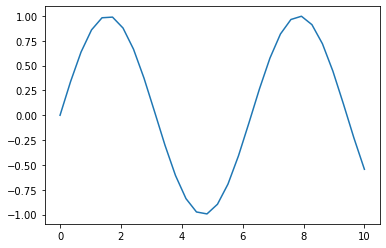

In [18]:
x = np.linspace(0, 10, 30)  #  [start, stop], num
y = np.sin(x)

fig = plt.figure()
ax = plt.axes()              # не axis, a axes !
ax.plot(x, y);

Цвета - в краткой нотации `rgbcmyk` в полной `'blue'`, `'#FFDD44'`, RGB: `(1.0,0.2,0.3)` или оттенки серого: `'0.75'`

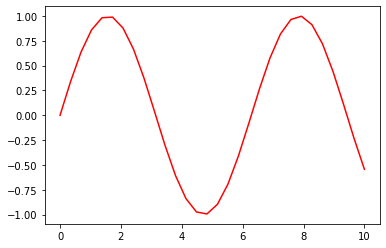

In [3]:
plt.figure()
plt.plot(x, y, color='r');

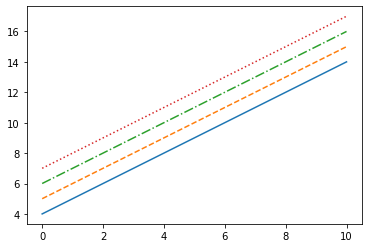

In [4]:
plt.figure()
plt.plot(x, x + 4, linestyle='-')    # сплошная линия
plt.plot(x, x + 5, linestyle='--')   # штриховая линия
plt.plot(x, x + 6, linestyle='-.')   # штрихпунктирная линия
plt.plot(x, x + 7, linestyle=':');    # пунктирная линия

Кратко стиль и цвет в одном параметре:

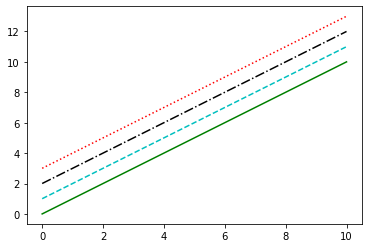

In [5]:
plt.figure()
plt.plot(x, x + 0, '-g')      # сплошная линия зеленого цвета
plt.plot(x, x + 1, '--c')     # штриховая линия голубого цвета
plt.plot(x, x + 2, '-.k')     # штрихпунктирная линия черного цвета
plt.plot(x, x + 3, ':r');     # пунктирная линия красного цвета

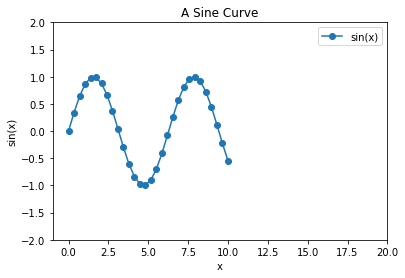

In [19]:
plt.figure()
plt.plot(x, y, "-o", label='sin(x)')  # потом вызвать plt.legend()
plt.axis([-1, 20, -2, 2]);      # plt.xlim(-1, 20);   plt.ylim(-2, 2); можно отзеркалить (2, -2)
plt.title("A Sine Curve") 
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()                   #  отслеживает стиль и цвет линии
plt.show()

Команды `plt` и `ax` (объектно-ориентированный поход) совпадают, кроме:
```
• plt.xlabel()  →  ax.set_xlabel()
• plt.ylabel()  →  ax.set_ylabel()
• plt.xlim()    →  ax.set_xlim()
• plt.ylim()    →  ax.set_ylim()
• plt.title()   →  ax.set_title()
```

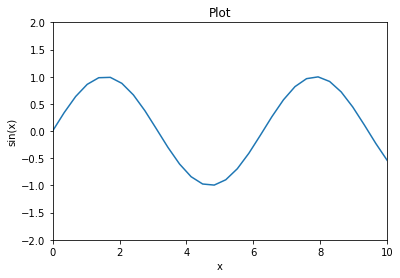

In [7]:
ax = plt.axes()
ax.plot(x, y)
ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='Plot');

Типы маркеров:  `['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']`<br>
Можно совмещать с типом линии и цветом:

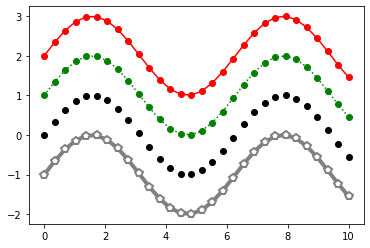

In [8]:
plt.figure()
plt.plot(x, y+2, marker='o', color='r')  # линия есть, уточняем маркер
plt.plot(x, y+1, ':og')                  # пуктирная линия, маркер, цвет
plt.plot(x, y,   'o', color='black')     # нет линии
plt.plot(x, y-1, '-p', color='gray', markersize=8, linewidth=4,  markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
plt.show()

## Диаграмма рассеяния

В отличии от `plot`, функция `scatter`  можно менять свойства каждой точки  (размер, цвет заливки, цвет рамки и т. д.).<br>
Но `plot` может оказаться намного эффективнее `scatter` при большом числе точек.

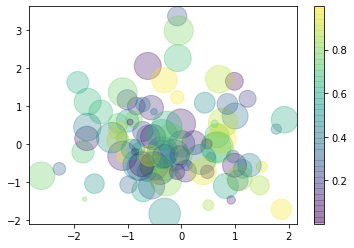

In [9]:
x, y = np.random.randn(100), np.random.randn(100)
colors = np.random.rand(100)
sizes = 1000 * np.random.rand(100)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # Отображаем цветовую шкалу

На диаграмме рассеяния  одновременно  четыре различных измерения данных: (x, y)-координаты каждой точки 
(длина и ширине чашелистика), размер точки — ширина лепестков, цвет — одна из трёх разновидностей цветка (с 4-я признаками). 

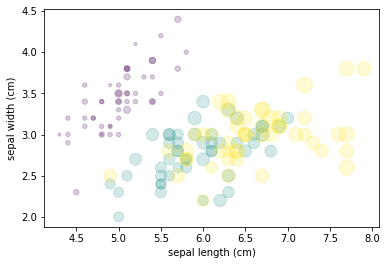

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T 
plt.scatter(features[0], features[1], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Бары погрешностей

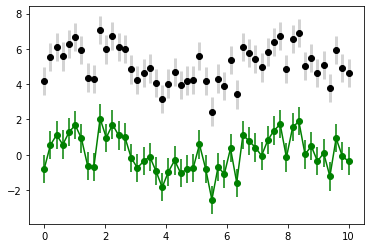

In [29]:
#plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='-og')
plt.errorbar(x, y+5, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

Алгоритм **регрессии на основе  Гауссова процесса**  возле измеренной точки данных модель жестко ограничена, в удаленных от измеренной точки данных областях модель жестко не ограничивается и ошибки модели растут.

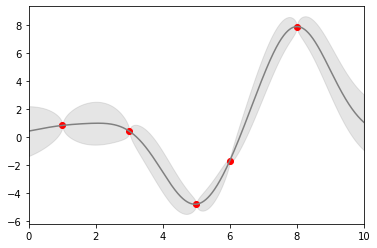

In [28]:
from sklearn.gaussian_process import GaussianProcessRegressor
# Описываем модель и отрисовываем некоторые данные
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Выполняем подгонку Гауссова процесса
gp = GaussianProcessRegressor ()
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)  # 2*сигма ~ область с уровнем доверия 95%

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
    
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)  # !!!!
plt.xlim(0, 10);

## Гистограммы

`Seaborn` предоставляет API поверх библиотеки Matplotlib, обеспечивающий разумные варианты стилей графиков, интегрирированная с
библиотекой Pandas (в отличии от `plt`).

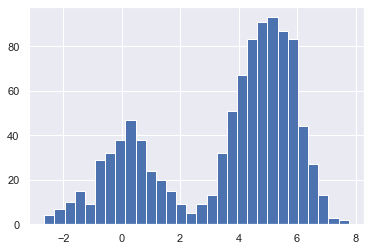

In [37]:
import seaborn as sns; sns.set()   # !!!!
    
def make_data(N, f=0.3, rseed=1):    
    x = np.random.randn(N)
    x[int(f * N):] += 5
    return x 
x = make_data(1000)    

hist = plt.hist(x, bins=30);

## Гистограммы с несколькими  системами координат

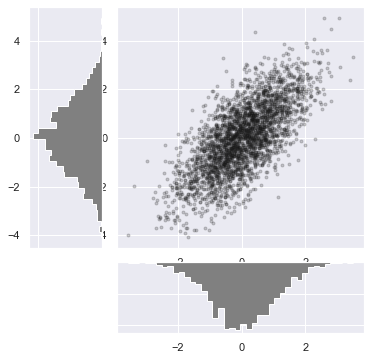

In [38]:
mean, cov = [0, 0],    [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T 

# Задаем системы координат с помощью функции GridSpec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist  = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist  = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# Распределяем точки по основной системе координат
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# Рисуем гистограммы на дополнительных системах координат 
x_hist.hist(x, 40, histtype='stepfilled',  orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',  orientation='horizontal', color='gray')
y_hist.invert_xaxis()        

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


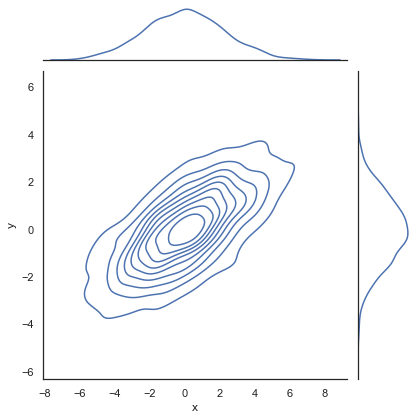

In [36]:
import pandas as pd
import seaborn as sns; sns.set()   # !!!!

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]],  size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

In [39]:
827/3

275.6666666666667